In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

mnist_data = pd.read_csv('mnist.csv')
mnist_data.head()

In [8]:
from sklearn.decomposition import PCA

# Extracting the data values (all columns except the first one)
data = mnist_data.iloc[:, 1:]

# Initializing PCA to reduce dimensions to 2
pca = PCA(n_components=2)
mnist_2d = pca.fit_transform(data)

# Creating a DataFrame for the reduced data
mnist_2d_df = pd.DataFrame(mnist_2d, columns=['Feature_1', 'Feature_2'])
mnist_2d_df['Label'] = mnist_data.iloc[:, 0]  # Adding original labels for potential visualization

mnist_2d_df.head()

,Feature_1,Feature_2,Label
0,-75.846566,-1043.489382,2
1,-969.403357,-344.746285,1
2,1054.129584,-358.629687,0
3,420.938861,671.105231,4
4,-1002.825170,-302.480049,1


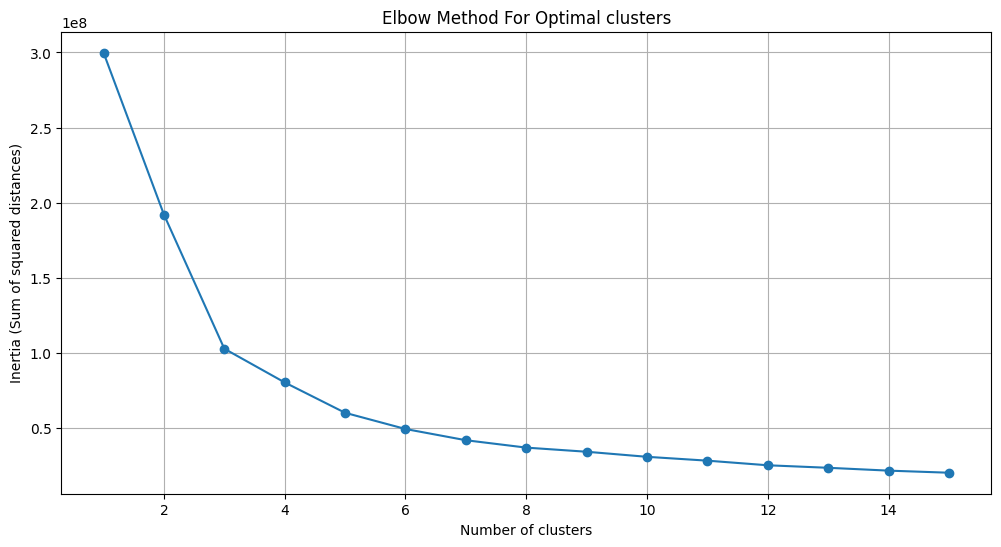

In [6]:
# Applying the elbow method to find the optimal number of clusters
cluster_range = range(1, 16)
inertia_values = []

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(mnist_2d_df.iloc[:, :2])
    inertia_values.append(kmeans.inertia_)


plt.figure(figsize=(12, 6))
plt.plot(cluster_range, inertia_values, marker='o')
plt.title('Elbow Method For Optimal clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (Sum of squared distances)')
plt.grid(True)
plt.show()

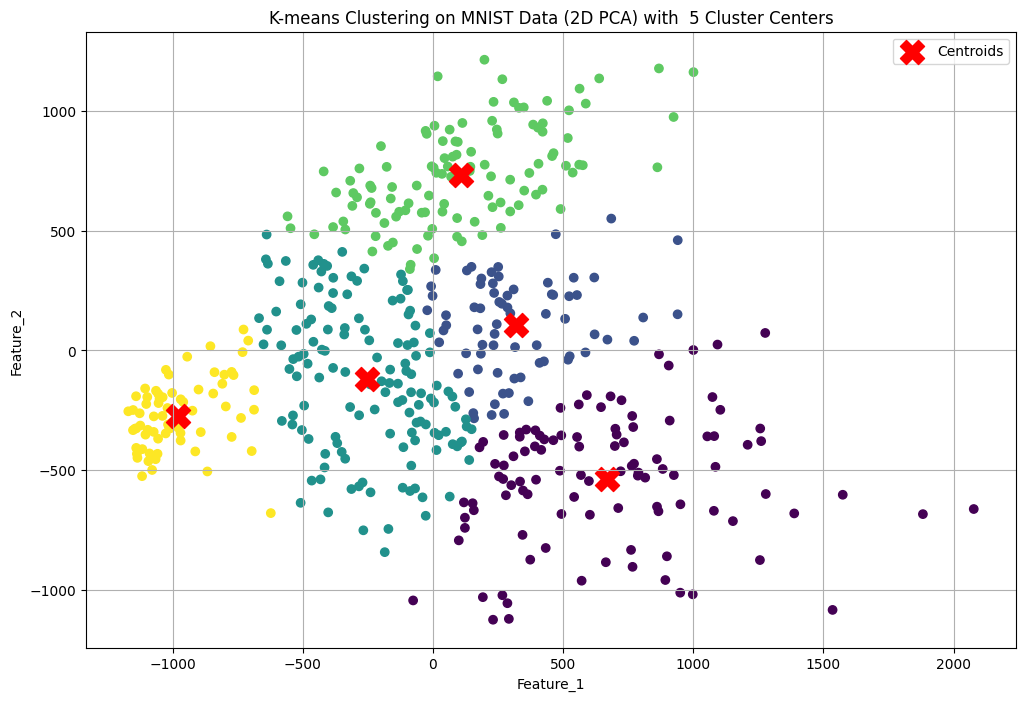

In [7]:
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(mnist_2d_df)

plt.figure(figsize=(12, 8))
plt.scatter(mnist_2d_df['Feature_1'], mnist_2d_df['Feature_2'], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title(f'K-means Clustering on MNIST Data (2D PCA) with  {n_clusters} Cluster Centers')
plt.xlabel('Feature_1')
plt.ylabel('Feature_2')
plt.grid(True)
plt.legend()

plt.show()